In [1]:
#sudo pip install scikit-learn
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('indian_liver_patient.csv', engine='python')
df2=df
df2.dropna(inplace=True)
print(df)

     Age  Gender  Total_Bilirubin  ...  Albumin  Albumin_and_Globulin_Ratio  Dataset
0     65  Female              0.7  ...      3.3                        0.90        1
1     62    Male             10.9  ...      3.2                        0.74        1
2     62    Male              7.3  ...      3.3                        0.89        1
3     58    Male              1.0  ...      3.4                        1.00        1
4     72    Male              3.9  ...      2.4                        0.40        1
..   ...     ...              ...  ...      ...                         ...      ...
578   60    Male              0.5  ...      1.6                        0.37        2
579   40    Male              0.6  ...      3.2                        1.10        1
580   52    Male              0.8  ...      3.2                        1.00        1
581   31    Male              1.3  ...      3.4                        1.00        1
582   38    Male              1.0  ...      4.4                  

In [3]:
#Replacing Male as 1 and Female as 0
df.Gender=df.Gender.replace('Female',0)
df.Gender=df.Gender.replace('Male',1)
#Removing Class Label
df=df.drop('Dataset',axis=1)
df.dropna(inplace=True)
#Checking Null Values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [0]:
#df.to_csv(r'ind_liver.csv', index = False)

In [5]:
print(df.describe())
print(np.any(np.isnan(df)))
print(np.all(np.isfinite(df)))
#df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
print("Dimension of dataset: df.shape")
df.dtypes

              Age      Gender  ...     Albumin  Albumin_and_Globulin_Ratio
count  579.000000  579.000000  ...  579.000000                  579.000000
mean    44.782383    0.758204  ...    3.138515                    0.947064
std     16.221786    0.428542  ...    0.794435                    0.319592
min      4.000000    0.000000  ...    0.900000                    0.300000
25%     33.000000    1.000000  ...    2.600000                    0.700000
50%     45.000000    1.000000  ...    3.100000                    0.930000
75%     58.000000    1.000000  ...    3.800000                    1.100000
max     90.000000    1.000000  ...    5.500000                    2.800000

[8 rows x 10 columns]
False
True
Dimension of dataset: df.shape


Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object

In [6]:
import numpy as np                 # Data manipulation
import pandas as pd                # Dataframe manipulatio 
import matplotlib.pyplot as plt    # For graphics
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.preprocessing import normalize       # To Normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture       #For GMM clustering

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


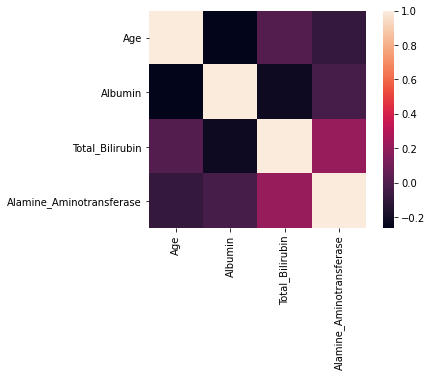

In [7]:
#Taking the relevant features from our observation in R Studio after doing PCA
df1 = df[['Age','Albumin','Total_Bilirubin','Alamine_Aminotransferase']] #Subsetting the data
cor = df1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [0]:
#Preprocessing
#Standardization
from sklearn.preprocessing import Normalizer
ss = StandardScaler()
dft=ss.fit_transform(df1)

#Normalization
scaler = Normalizer().fit(dft)
dfn = scaler.transform(dft)

#Class Label Extraction
df2=(df2["Dataset"])
#print(dft)
#print(dfn)

Text(0.5, 0.92, 'K Means')

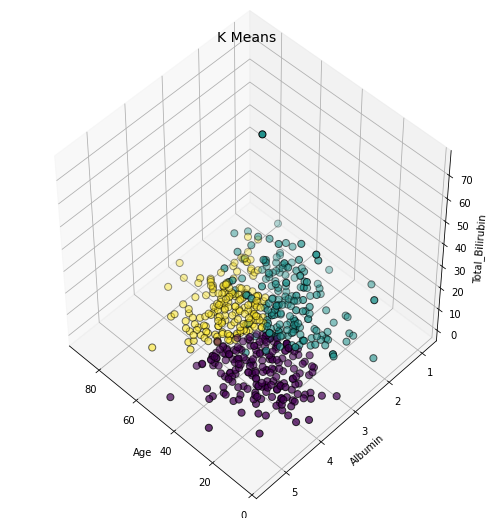

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
#KMeans
km = KMeans(n_clusters=3)
km.fit(dfn)
km.predict(df1)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df1["Age"], df1["Albumin"], df1["Total_Bilirubin"],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Age")
ax.set_ylabel("Albumin")
ax.set_zlabel("Total_Bilirubin")
plt.title("K Means", fontsize=14)

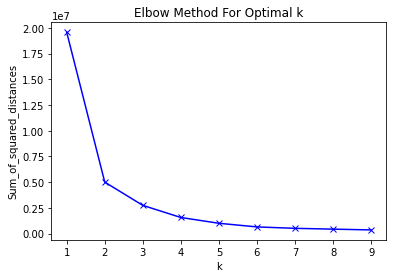

In [10]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
def doKmeans(X, nclust):
    model = KMeans(nclust, random_state=0)
    model.fit(X)
    clust_labels0 = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels0, cent)

clust_labels0, cent = doKmeans(dfn, 3)
kmeans = pd.DataFrame(clust_labels0)
#df1.insert((df1.shape[1]),'kmeans',kmeans)

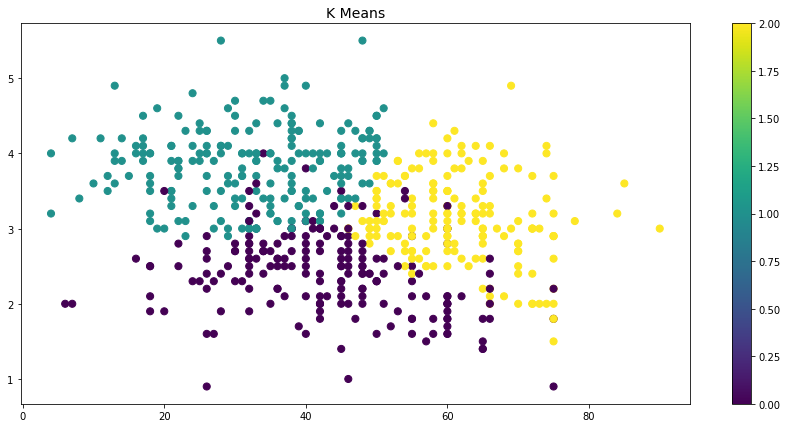

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(df1['Age'],df1['Albumin'], c=kmeans[0],s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Albumin')
plt.title("K Means", fontsize=14)
plt.colorbar()

In [0]:
def doAgglomerative(X, nclust):
    model = AgglomerativeClustering(n_clusters=nclust)
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(dfn, 3)
agglomerative = pd.DataFrame(clust_labels1)
#df1.insert((df1.shape[1]),'agglomerative',agglomerative)

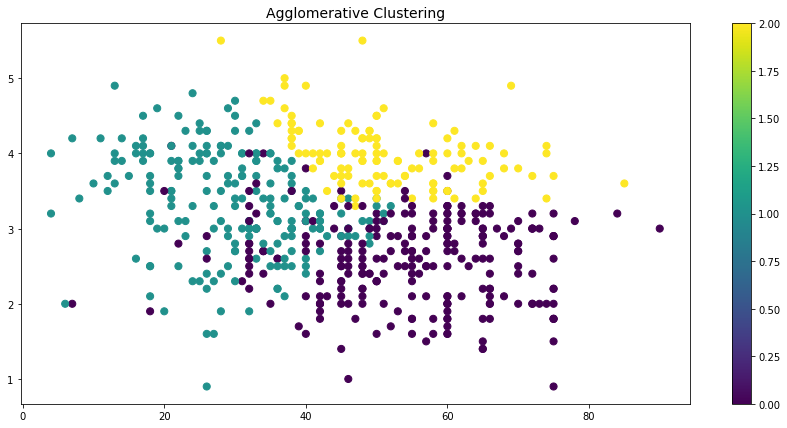

In [14]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
plt.figure(figsize=(15,7))
plt.scatter(df1['Age'],df1['Albumin'], c=agglomerative[0],s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Albumin')
plt.title("Agglomerative Clustering", fontsize=14)
plt.colorbar()

In [0]:
def doGMM(X, nclust):    
    model = GaussianMixture(n_components=3,init_params='kmeans', random_state=0)
    model.fit(X)
    clust_labels2 = model.predict(X)
    return (clust_labels2)

clust_labels2 = doGMM(dfn,3)
gmm = pd.DataFrame(clust_labels2)
#df1.insert((df1.shape[1]),'gmm',gmm)

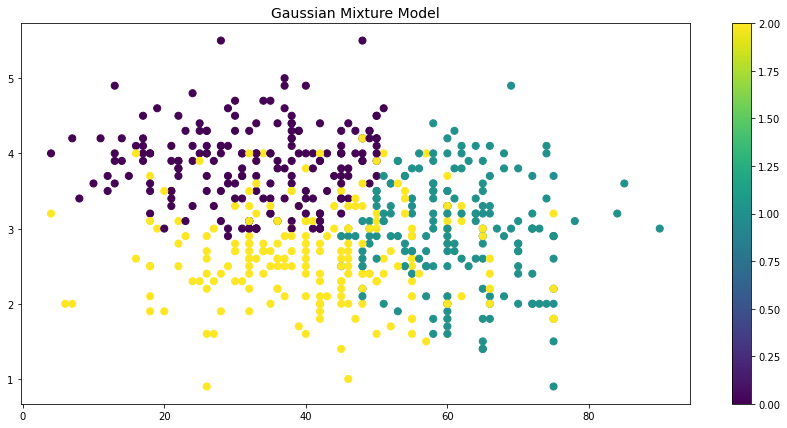

In [16]:
#Plotting the cluster obtained using GMM
plt.figure(figsize=(15,7))
plt.scatter(df1['Age'],df1['Albumin'], c=gmm[0],s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Albumin')
plt.title("Gaussian Mixture Model", fontsize=14)
plt.colorbar()

In [0]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
dbscan = DBSCAN(eps=0.3, min_samples = 15)
clust_labels3 = dbscan.fit_predict(dfn)

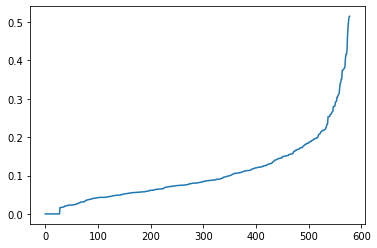

In [18]:
#To find optimal eps
neigh = NearestNeighbors(n_neighbors= 3)
nbrs = neigh.fit(dfn)
distances, indices = nbrs.kneighbors(dfn)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

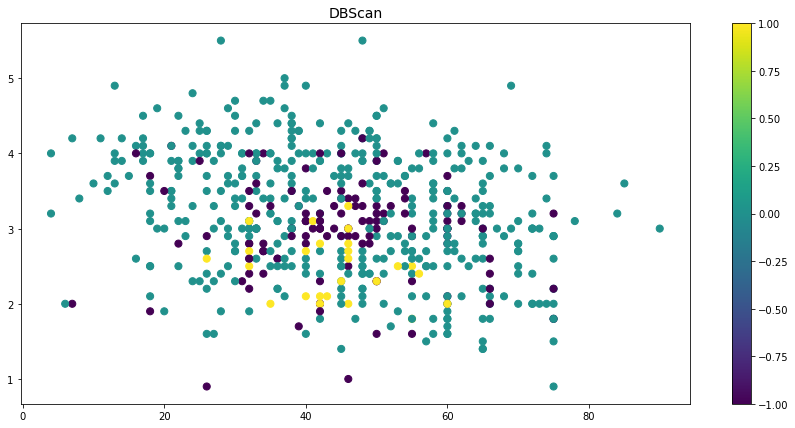

In [19]:
#Plot the cluster assignments
plt.figure(figsize=(15,7))
plt.scatter(df1["Age"], df1["Albumin"], c=clust_labels3, s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Albumin')
plt.title("DBScan", fontsize=14)
plt.colorbar()

In [0]:
#Birch
from sklearn.cluster import Birch
bclust=Birch(branching_factor=100, threshold=.2).fit(dfn)
Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.1)  
clust_labels4 = bclust.predict(dfn)

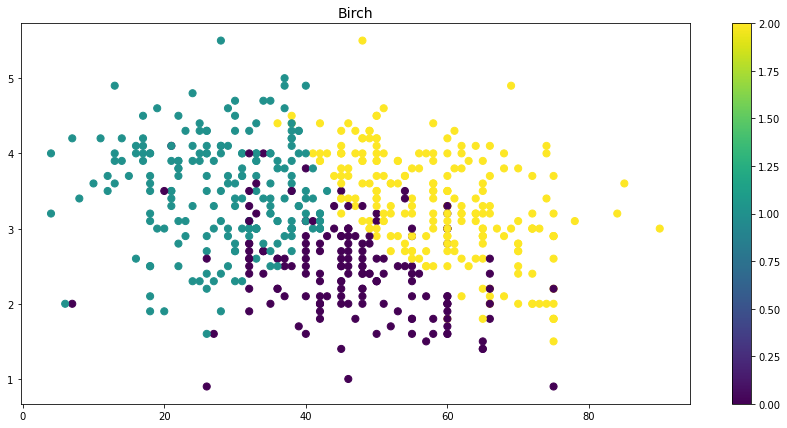

In [21]:
# plot the cluster assignments
plt.figure(figsize=(15,7))
plt.scatter(df1["Age"], df1["Albumin"], c=clust_labels4, s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Albumin')
plt.title("Birch", fontsize=14)
plt.colorbar()

In [0]:
#Spectral Clustering Model
from sklearn.cluster import SpectralClustering
spectral_model_rbf = SpectralClustering(n_clusters = 3,random_state=0)
clust_labels5 = spectral_model_rbf.fit_predict(dfn)

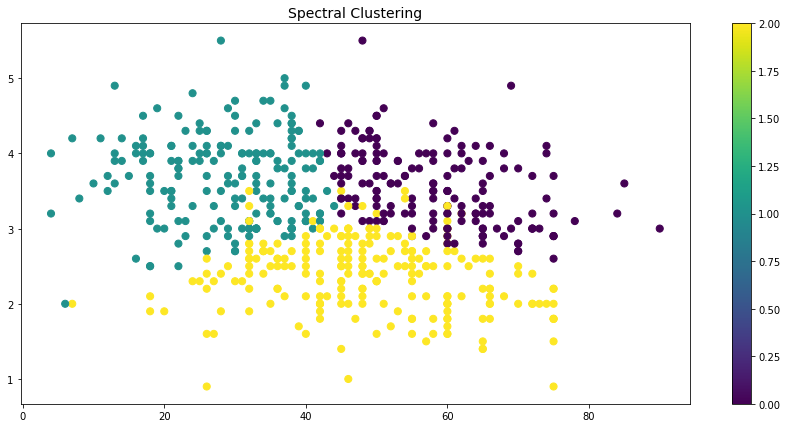

In [23]:
# plot the cluster assignments
plt.figure(figsize=(15,7))
plt.scatter(df1["Age"], df1["Albumin"], c=clust_labels5, s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Albumin')
plt.title("Spectral Clustering", fontsize=14)
plt.colorbar()

In [24]:
def counter(clust_list):
    a = np.array(clust_list)
    unique, counts = np.unique(a, return_counts=True)
    df_clust=dict(zip(unique, counts))
    return df_clust
print(counter(clust_labels0))
print(counter(clust_labels1))
print(counter(clust_labels2))
print(counter(clust_labels3))
print(counter(clust_labels4))
print(counter(clust_labels5))
# Ground Truth 416 (1) Liver Patient/ 167 Non-Liver (2)

{0: 195, 1: 209, 2: 175}
{0: 254, 1: 208, 2: 117}
{0: 188, 1: 175, 2: 216}
{-1: 126, 0: 428, 1: 25}
{0: 162, 1: 200, 2: 217}
{0: 164, 1: 194, 2: 221}


In [25]:
#Kmeans
clust0=np.where(clust_labels0==0, 1, clust_labels0)
print("Kmeans :\t",counter(clust0))
#print(type(clust0))
kmeans = pd.Series(clust0)
#print(kmeans)

#Agglo
clust1=np.where(clust_labels1==0, 1, clust_labels1)
print("Agglomerative :\t",counter(clust1))
agglo = pd.Series(clust1)

#GMM
clust2=np.where(clust_labels2==2, 0, clust_labels2)
clust2=np.where(clust2==1, 2, clust2)
clust2=np.where(clust2==0, 1, clust2)
print("GMM    :\t",counter(clust2))
gmm = pd.Series(clust2)

#DBSCAN
clust3=np.where(clust_labels3==-1, 1, clust_labels3)
clust3=np.where(clust3==1, 2, clust3)
clust3=np.where(clust3==0, 1, clust3)
print("DBSCAN :\t",counter(clust3))
dbscan = pd.Series(clust3)

#Birch
clust4=np.where(clust_labels4==2, 1, clust_labels4)
clust4=np.where(clust4==0, 2, clust4)
print("Birch  :\t",counter(clust4))
birch = pd.Series(clust4)

#Spectral
clust5=np.where(clust_labels5==2, 1, clust_labels5)
clust5=np.where(clust5==0, 2, clust5)
print("Spectral :\t",counter(clust5))
spec = pd.Series(clust5)

Kmeans :	 {1: 404, 2: 175}
Agglomerative :	 {1: 462, 2: 117}
GMM    :	 {1: 404, 2: 175}
DBSCAN :	 {1: 428, 2: 151}
Birch  :	 {1: 417, 2: 162}
Spectral :	 {1: 415, 2: 164}


In [26]:
#Counts of original dataset vs. predicted
nonliverori = len(counter(np.where(df2==1)))
liverori = len(counter(np.where(df2==2)))
print("Ground truth patients no of Liver Disease :\t", nonliverori)
print("Ground truth patients of Liver Disease :\t",liverori)

#Average of all results
liver=(len(counter(np.where(clust0==1)))+len(counter(np.where(clust1==1)))+len(counter(np.where(clust2==1)))+len(counter(np.where(clust3==1)))
+len(counter(np.where(clust4==1)))+len(counter(np.where(clust5==1))))/6

nonliver=(len(counter(np.where(clust0==2)))+len(counter(np.where(clust1==2)))+len(counter(np.where(clust2==2)))+len(counter(np.where(clust3==2)))
+len(counter(np.where(clust4==2)))+len(counter(np.where(clust5==2))))/6

print("Predicted patients of Liver Disease :\t",liver)
print("Predicted patients of no Liver Disease :\t",nonliver)

Ground truth patients not of Liver Disease :	 414
Ground truth patients of Liver Disease :	 165
Predicted patients of Liver Disease :	 421.6666666666667
Predicted patients of Liver Disease :	 157.33333333333334


In [0]:
#Voting
#Birch comes closeest to out ground truth with 417 liver patients and 162 liver patients

In [28]:
#Mutual Information Score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
knmi=normalized_mutual_info_score(df2, kmeans)
print("NMI Kmeans    : \t", knmi)
anmi=normalized_mutual_info_score(df2, agglo)
print("NMI Agglomerative : \t", anmi)
gnmi=normalized_mutual_info_score(df2, gmm)
print("NMI GMM       : \t", gnmi)
dnmi=normalized_mutual_info_score(df2, dbscan)
print("NMI DBSCAN    : \t", dnmi)
bnmi=normalized_mutual_info_score(df2, birch)
print("NMI Birch      : \t", bnmi)
snmi=normalized_mutual_info_score(df2, spec)
print("NMI Spectral   : \t", snmi)

NMI Kmeans    : 	 9.62014939579796e-07
NMI Agglomerative : 	 0.009004648845314758
NMI GMM       : 	 0.002873161908783733
NMI DBSCAN    : 	 0.04981477188745141
NMI Birch      : 	 0.03266673975628611
NMI Spectral   : 	 0.0010872226974272844


In [29]:
#AUC kmean
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df2, kmeans, pos_label=2)
metrics.auc(fpr, tpr)

0.5005489679402723

In [30]:
#AUC agglo
fpr, tpr, thresholds = roc_curve(df2, agglo, pos_label=2)
metrics.auc(fpr, tpr)

0.5451690821256038

In [31]:
#AUC GMM
fpr, tpr, thresholds = roc_curve(df2, gmm, pos_label=2)
metrics.auc(fpr, tpr)

0.5302151954325868

In [32]:
#AUC DBScan
fpr, tpr, thresholds = roc_curve(df2, dbscan, pos_label=2)
metrics.auc(fpr, tpr)

0.389679402722881

In [33]:
#AUC Birch
fpr, tpr, thresholds = roc_curve(df2, birch, pos_label=2)
metrics.auc(fpr, tpr)

0.4060606060606061

In [34]:
#AUC Spec
fpr, tpr, thresholds = metrics.roc_curve(df2, spec, pos_label=2)
metrics.auc(fpr, tpr)

0.5180720245937638

In [35]:
#Contingecy Table
kmeantable = metrics.cluster.contingency_matrix(df2, kmeans)
print("Kmeans\n",kmeantable)
agglotable = metrics.cluster.contingency_matrix(df2, agglo)
print("Agglomerative\n",agglotable)
gmmtable = metrics.cluster.contingency_matrix(df2, gmm)
print("GMM\n",gmmtable)
dbtable = metrics.cluster.contingency_matrix(df2, dbscan)
print("DBSCAN\n",dbtable)
birchtable = metrics.cluster.contingency_matrix(df2, birch)
print("Birch\n",birchtable)
spectable = metrics.cluster.contingency_matrix(df2, spec)
print("Spectral\n",spectable)

Kmeans
 [[289 125]
 [115  50]]
Agglomerative
 [[341  73]
 [121  44]]
GMM
 [[296 118]
 [108  57]]
DBSCAN
 [[280 134]
 [148  17]]
Birch
 [[276 138]
 [141  24]]
Spectral
 [[301 113]
 [114  51]]


In [36]:
#Completeness Metric
from sklearn.metrics.cluster import completeness_score
print("Kmeans :\t",completeness_score(df2, kmeans))
print("Agglomerative :\t",completeness_score(df2, agglo))
print("GMM    :\t",completeness_score(df2, gmm))
print("DBSCAN :\t",completeness_score(df2, dbscan))
print("Birch  :\t",completeness_score(df2, birch))
print("Spectral :\t",completeness_score(df2, spec))

Kmeans :	 9.501107747681285e-07
Agglomerative :	 0.009848532028505746
GMM    :	 0.002837608830047028
DBSCAN :	 0.0508435441079679
Birch  :	 0.03279990006929156
Spectral :	 0.0010886785488665343


In [37]:
#Purity score of individual Methods / Accuracy Score
from sklearn import metrics
from scipy.optimize import linear_sum_assignment

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)

    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum() / np.sum(contingency_matrix)

print("Kmeans :\t",purity_score(df2, kmeans))
print("Agglomerative :\t",purity_score(df2, agglo))
print("GMM    :\t",purity_score(df2, gmm))
print("DBSCAN :\t",purity_score(df2, dbscan))
print("Birch  :\t",purity_score(df2, birch))
print("Spectral :\t",purity_score(df2, spec))

Kmeans :	 0.5854922279792746
Agglomerative :	 0.6649395509499136
GMM    :	 0.6096718480138169
DBSCAN :	 0.5129533678756477
Birch  :	 0.5181347150259067
Spectral :	 0.6079447322970639


**Conclusion**

From the above project we learn that we are able to produce much more accurate results with the average results of all the algorithms combined
that said, we still achieve quite a low accuracy score, given the fact that unsupervised methods generally do perform poorly for large datasets.
We come to the conclusion that ensemble clustering can accurately predcit the division of the dataset, but cant tell accurately what record belongs
to what class. Although Measures like boosting and stacking have the potential to further improve on the results  obtained